In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1" # export OMP_NUM_THREADS=4
os.environ["OPENBLAS_NUM_THREADS"] = "1" # export OPENBLAS_NUM_THREADS=4 
os.environ["MKL_NUM_THREADS"] = "1" # export MKL_NUM_THREADS=6


In [2]:
import dask
import numpy as np
import dask.array as da
import lmdec
from lmdec.decomp.svd_init import *
from lmdec.decomp.iter_methods import PowerMethod
import h5py
import matplotlib.pyplot as plt

In [3]:
array_file_path = '/Users/tnonet/Documents/SVD_Matricies/data/20K_80K.h5py'

assert os.path.isfile(array_file_path)
array_file_path = os.path.abspath(array_file_path)
f = h5py.File(array_file_path, 'r')
snp_array = dask.array.from_array(f['/array'])

In [4]:
PM = PowerMethod(max_iter=200, k=10, buffer=10, tol=1e-4, p=1,
                 sub_svd_start=True, scoring_method='q-vals')
U, S, V = PM.svd(snp_array)

In [5]:
print(PM.time)
print(len(PM.tol_iterations))

131.8253870010376
12


In [6]:
PM2 = PowerMethod(max_iter=200, k=10, buffer=10, tol=1e-4, p=1,
                 sub_svd_start=False, scoring_method='q-vals')
U2, S2, V2 = PM2.svd(snp_array)

In [7]:
print(PM2.time)
print(len(PM2.tol_iterations))

120.61759519577026
14


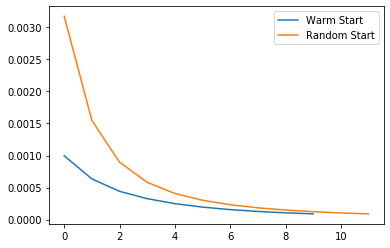

In [8]:
plt.plot(PM.tol_iterations[2:], label = 'Warm Start')
plt.plot(PM2.tol_iterations[2:], label='Random Start')
plt.legend()
plt.show()

[inf,
 0.5366707221286605,
 0.0031746699105527037,
 0.0015487851749622812,
 0.0008960331070809895]

In [27]:
m, n = 10000, 40000
A = da.random.random((m, n)) - 1.00*da.random.uniform(size=(m,n))
A = A.persist()
#A = np.random.rand(m,n)
# U, S, V = np.linalg.svd(A)
# S = np.array(S)
# A = A.T.dot(A)
# snp_array = da.array(A)

In [28]:
x, log = eigengap_svd_start(A, k=10, b_max=50, tol=1e-6, log=1, warm_start_row_factor=5)

Rows: 300


/Users/tnonet/Documents/GitHub/lamade/lamade/decomp/svd_init.py:162: RuntimeWarning: divide by zero encountered in log
  return np.log(x) / np.log(b)


In [29]:
log

{'S': array([113.40217574, 113.20217547, 113.12191214, 113.04053252,
        112.83042171, 112.80833608, 112.65183897, 112.51766196,
        112.43670425, 112.37920201, 112.31761619, 112.1896821 ,
        112.14569639, 112.1311436 , 112.06796174, 111.99640684,
        111.94074512, 111.77234237, 111.72482181, 111.69352086,
        111.66081619, 111.55879674, 111.47707027, 111.42027734,
        111.37435724, 111.30354342, 111.22839414, 111.20405022,
        111.16406481, 111.01153344, 110.98994586, 110.88567076,
        110.82850758, 110.81249797, 110.72454645, 110.66710815,
        110.63922336, 110.61236586, 110.47771884, 110.45080704,
        110.37164569, 110.26050904, 110.19668906, 110.09641139,
        110.04739772, 109.96347952, 109.92072757, 109.87895847,
        109.81282222, 109.68045912, 109.61158933, 109.52689044,
        109.5168354 , 109.4383274 , 109.32843699, 109.31354079,
        109.15072058, 108.95841412, 108.88384893, 108.83066361]),
 'req_iter': array([          inf

In [17]:
def y_decrease(costs, k, y):
    init_time = costs[k]
    expon = list(range(0, len(costs)))
    return init_time*np.power(y, expon)

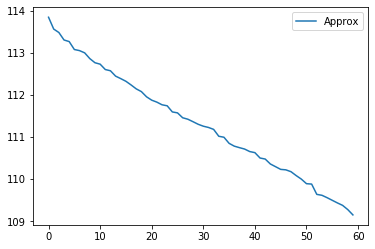

In [18]:
#plt.plot(S, label='Real')
plt.plot(log['S'], label='Approx')
plt.legend()

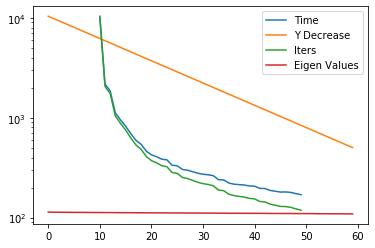

In [19]:
k = 10
plt.plot(log['costs'], label ='Time')
plt.plot(y_decrease(log['costs'], k, .95), label='Y Decrease')
plt.plot(log['req_iter'], label='Iters')
plt.plot(log['S'], label='Eigen Values')
plt.yscale('log')
plt.legend()
plt.show()

In [20]:
b_range = [0,5,10,15,20,25,30,35,40,45,50]
run_times = []
iters = []
for b in b_range:
    PM = PowerMethod(max_iter=200, k=k, buffer=b, scoring_tol=1e-1, p=.1, sub_svd_start=False)
    _, _, _ = PM.svd(A)
    run_times.append(PM.logs['end'] - PM.logs['start'])
    iters.append(PM.logs['tol'])

Normal Start Method
Normal Start Method
Normal Start Method
Normal Start Method
Normal Start Method
Normal Start Method
Normal Start Method
Normal Start Method
Normal Start Method
Normal Start Method
Normal Start Method


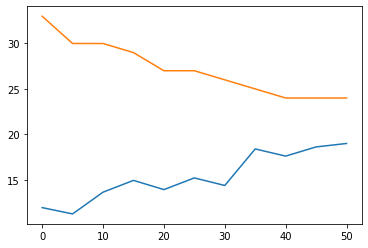

In [23]:
plt.plot(b_range, run_times)
plt.plot(b_range, [len(i) for i in iters])

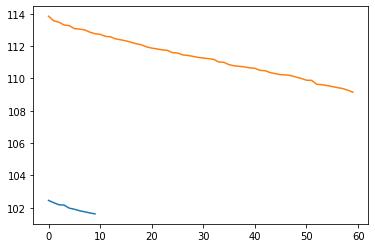

In [26]:
plt.plot(PM.logs['S'][-1])
plt.plot(log['S'])

In [14]:
PM = PowerMethod(max_iter=200, k=k, buffer=10, scoring_tol=1e-1, p=.1, sub_svd_start=True)
_, _, _ = PM.svd(A)
print(PM.logs['end'] - PM.logs['start'])

Normal Start Method
14.080413103103638


In [15]:
U, S, V, log = SVD_m2(snp_array,
                      k=10,
                      over_sampling=1,
                      tsqr_period_threshold=0,
                      error_sample_period=0,
                      max_iter=20)

print(len(log['tol']))
print(log['end']-log['start'])

NameError: name 'SVD_m2' is not defined

In [ ]:
U, S, V, log = svdecomp.decomp.SVD_m2(snp_array,
                                      k=10,
                                      over_sampling=10,
                                      tsqr_period_threshold=0,
                                      error_sample_period=0,
                                      max_iter=20)

print(log['end']-log['start'])

In [ ]:
U, S, V, log = svdecomp.decomp.SVD_m2(snp_array,
                                      k=10,
                                      over_sampling=30,
                                      tsqr_period_threshold=0,
                                      error_sample_period=0,
                                      max_iter=20)

print(log['end']-log['start'])

In [ ]:
U, S, V, log = svdecomp.decomp.SVD_m2(snp_array,
                                      k=10,
                                      over_sampling=60,
                                      tsqr_period_threshold=0,
                                      error_sample_period=0,
                                      max_iter=20)

print(log['end']-log['start'])

In [ ]:
U, S, V, log = svdecomp.decomp.SVD_m2(snp_array,
                                      k=10,
                                      over_sampling=100,
                                      tsqr_period_threshold=0,
                                      error_sample_period=0,
                                      max_iter=20)

print(log['end']-log['start'])

In [ ]:
a = []
b = 1

In [ ]:
if b:

In [ ]:
a = np.arange(10)

In [ ]:
a

In [ ]:
a[:None]